In [113]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np 
import statistics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [114]:
#Importuję zbiór danych IRIS
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

In [115]:
#Dzielę zbiór na PU - 80% i PT - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
#Wektor sprawdzanych klasyfikatorów 
M = [1,2,5,10,20,50]

#Wektory na błędne klasyfikacje 
tree_false = []
lda_false = []

#Wektory skuteczności 
tree_accouracy = []
lda_accouracy = []




for m in M:
    #Bagging dla drzew decyzyjnych 
    #Parametr BaggingClassifier() - base_estimator domyślnie jest drzewem decyzyjnym
    bagg_tree = BaggingClassifier(n_estimators = m)
    bagg_tree.fit(X_train,y_train) 
    bagg_tree_predictions = bagg_tree.predict(X_test)
    tree_accouracy.append(bagg_tree.score(X_test,y_test))
    
    
    
    #Bagging oparty o klasyfikator LDA 
    bagg_lda = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),n_estimators=m)
    bagg_lda.fit(X_train, y_train)
    bagg_lda_predictions = bagg_lda.predict(X_test)
    lda_accouracy.append(bagg_lda.score(X_test,y_test))
    
    #Błędne klasyfikacje to suma wartości wszystkich komórek 
    #macierzy pomyłek, które nie leżą na diagonali. 
    tree_false.append(confusion_matrix(y_test, bagg_tree_predictions).sum() - confusion_matrix(y_test, bagg_tree_predictions).diagonal().sum())
    lda_false.append(confusion_matrix(y_test, bagg_lda_predictions).sum() - confusion_matrix(y_test, bagg_lda_predictions).diagonal().sum())
    
    
    
    
    

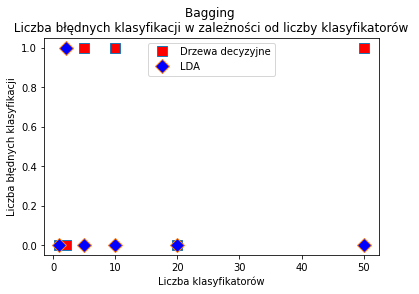

In [117]:
fig, ax = plt.subplots()
ax.plot(M,tree_false, marker='s',linestyle='None',markerfacecolor='red', markersize=10, label="Drzewa decyzyjne")
ax.plot(M,lda_false, marker='D',linestyle='None',markerfacecolor='blue', markersize=10, label="LDA")
ax.set_title('Bagging \n Liczba błędnych klasyfikacji w zależności od liczby klasyfikatorów ')
ax.set_xlabel('Liczba klasyfikatorów')
ax.set_ylabel('Liczba błędnych klasyfikacji')
ax.legend()
plt.show()

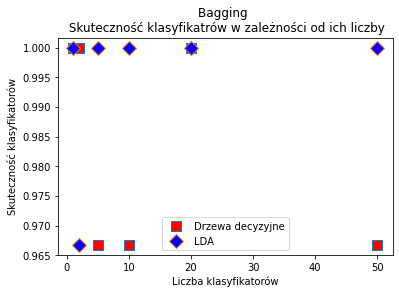

In [118]:
fig, ax = plt.subplots()
ax.plot(M,tree_accouracy, marker='s',linestyle='None',markerfacecolor='red', markersize=10, label="Drzewa decyzyjne")
ax.plot(M,lda_accouracy, marker='D',linestyle='None',markerfacecolor='blue', markersize=10, label="LDA")
ax.set_title('Bagging \n Skuteczność klasyfikatrów w zależności od ich liczby')
ax.set_xlabel('Liczba klasyfikatorów')
ax.set_ylabel('Skuteczność klasyfikatorów')
ax.legend()
plt.show()

Użycie metody bagging w oparciu czy to o drzewa decyzyjne czy o LDA daje wysoką skuteczność klasyfikatorów i nie obserwujemy wyraźnego związku owej skutecznośći (liczby błędnych klasyfikacji) z liczbą użytych klasyfikatorów dla rozpatrywanego modelowego zbioru IRIS. 